indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes.
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not

Frequency 2.32528889884e+11
Beam area 1.18530404814e-12
Pixel area 1.46902442703e-14
Pixels per beam area 80.6864764355
Jy per Beam to Jy per pixel 0.0123936506361
51.40133334 30.754147222
Average Beam:  0.217465497553 8.69861990213
[[  1.02399917e+03   1.02399997e+03  -1.16264447e+02  -1.00000000e+00]]
[  4.34930995   8.6986199   13.04792985  17.3972398   21.74654976
  26.09585971  30.44516966  34.79447961  39.14378956  43.49309951
  47.84240946  52.19171941  56.54102936  60.89033931  65.23964927
  69.58895922  73.93826917  78.28757912  82.63688907]


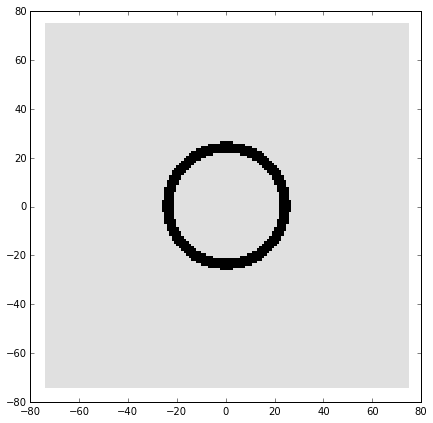

In [1]:
import numpy as np
#import pyfits as fits
import math
from astropy import wcs
from astropy.io import fits
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker


%matplotlib inline

# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&
# CGS PHYSICAL CONSTANTS
# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&

c = 2.99792458e10       # speed of light CGS
h = 6.6260755e-27       # Planck's constant CGS
g = 6.67259e-8          # Grav const CGS
kb = 1.380658e-16       # Boltzmann's const CGS
a = 7.56591e-15         # Radiation constant CGS
sb = 5.67051e-5         # sigma (stefan-boltzmann const) CGS
qe =  4.803206e-10      # Charge of electron CGS
ev =  1.60217733e-12    # Electron volt CGS
na =  6.0221367e23      # Avagadro's Number
me =  9.1093897e-28     # electron mass CGS
mp =  1.6726231e-24     # proton mass CGS
mn = 1.674929e-24       # neutron mass CGS
mh = 1.673534e-24       # hydrogen mass CGS
amu =  1.6605402e-24    # atomic mass unit CGS
pi = 3.14159
# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&
# ASTRONOMICAL CONSTANTS
# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&

# GENERAL
au = 1.496e13           # astronomical unit CGS
pc = 3.0857e18          # parsec CGS
yr = 3.155815e7         # sidereal year CGS
ms = 1.98900e+33        # solar mass CGS
rs = 6.9599e10          # sun's radius CGS
ls = 3.839e33           # sun's luminosity CGS
mm = 7.35000e+25        # moon mass CGS
mer = 5.97400e+27       # earth mass CGS
rer = 6.378e8           # earth's radius CGS
medd = 3.60271e+34      # Eddington mass CGS

# RADIO SPECIFIC
jy = 1.e-23                  # Jansky CGS
restfreq_hi = 1420405751.786 # 21cm transition (Hz)
restfreq_co = 115271201800.  # CO J=1-0 (Hz)
cm2perkkms_hi = 1.823e18     # HI column per intensity (thin)

pa=(90.0-25.0)*3.14159/180.0
#pa=(45.0)*3.14159/180.0

inc=45.0*3.14159/180.0
imagename='Per33_ALMA_cont_robust0.5.image.fits'
imagename='Per33_ALMA_cont_robust0.5_subclump.image.fits'
rms=1.4e-4
hdu = fits.open(imagename)
image = np.transpose(np.copy(hdu[0].data))
image=np.copy(hdu[0].data)
ra=3.426755556*15.0
dec=30.754147222
header= hdu[0].header
w = wcs.WCS(hdu[0].header)
    #w.wcs.print_contents()
    #pixcrd = numpy.array([[0, 0], [24, 38], [45, 98]], numpy.float_)
    #print pixcrd
    #pixcrd=np.array([[1000,1000],[1000,1000]])
    #world = w.wcs_pix2world(pixcrd, 0)
    #print(world)
pixscaledeg=header['CDELT2']
pixscale=header['CDELT2']*3600
bmaj=header['BMAJ']
bmin=header['BMIN']
npix=header['NAXIS1']
freq=header['RESTFRQ']
omega=(pi*bmaj*bmin)*(pi/180.0)**2
beamarea=(omega)/(4.0*math.log(2.0))
pixelarea=(pixscaledeg*pi/180.0)**2
print 'Frequency', freq
print 'Beam area', beamarea
print 'Pixel area', pixelarea
jybm2jy=1.0/beamarea*pixelarea
pixelsperbeam=beamarea/pixelarea

print 'Pixels per beam area', pixelsperbeam
print 'Jy per Beam to Jy per pixel',jybm2jy
image=image[::-1][::-1][:][:]*jybm2jy
print ra,dec

avgbeam=(bmaj+bmin)/2.0*3600.0
print 'Average Beam: ', avgbeam,avgbeam/pixscale
aperturebase=avgbeam/pixscale/2.0

world=np.array([[ra,dec,0,0]  ])
pix=w.wcs_world2pix(world, 0)
print pix
xcen=pix[0][0]
ycen=pix[0][1]
apertures=np.arange(1.0,20.0, dtype=np.float)*aperturebase
print apertures

#xgrid_off=np.arange(npix,dtype=np.float)-npix/2.0
#xgrid_off=np.arange(npix,dtype=np.float)-1016
#ygrid_off=np.arange(npix,dtype=np.float)-npix/2.0

xgrid_off=np.arange(npix,dtype=np.float)-xcen
ygrid_off=np.arange(npix,dtype=np.float)-ycen

ygrid_proj=ygrid_off #/np.cos(inc)
#print ygrid_proj

xgrid,ygrid=np.meshgrid(xgrid_off,ygrid_proj)

r = np.sqrt(xgrid**2 + (ygrid)**2)
mask1 = r < apertures[5]
mask2 = r > apertures[4] 
mask=mask1*mask2
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.pcolormesh(xgrid_off[950:1100],ygrid_proj[950:1100],mask[950:1100,950:1100], cmap='gray_r', vmin=-0.014, vmax=0.1)

1.13446305556
[False False  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True  True  True False
 False False]
(1, 1, 2048, 2048)
(2048, 2048)
(2048, 2048)


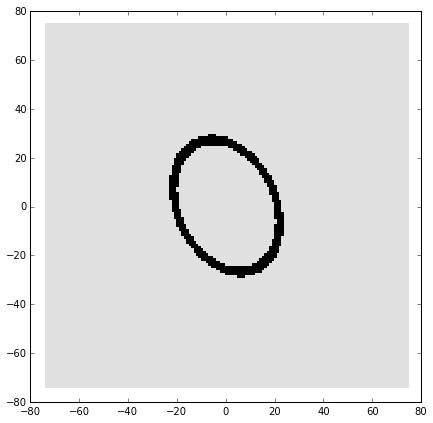

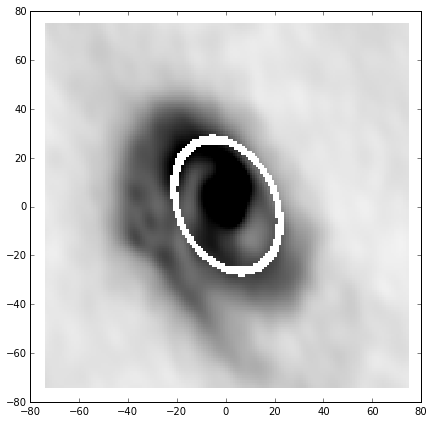

In [2]:

print pa

xgrid_rot= (xgrid * np.cos(pa) - ygrid * np.sin(pa)) # disk major axis
ygrid_rot= (xgrid * np.sin(pa) + ygrid * np.cos(pa)) # disk minor axis

#print xgrid_rot.shape
#print ygrid_rot.shape
#print xgrid_rot[1000:1050,1000:1050]
#print ygrid_rot[1000:1050,1000:1050]


r = np.sqrt(xgrid_rot**2 + (ygrid_rot/np.cos(inc))**2)
mask1 = r > apertures[5]
mask2 = r < apertures[6]
mask=mask1*mask2
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.pcolormesh(xgrid_off[950:1100],ygrid_off[950:1100],mask[950:1100,950:1100], cmap='gray_r', vmin=-0.014, vmax=0.1)

mask1 = r > apertures[5]
mask2 = r < apertures[6]
mask=mask1*mask2
print mask[1024][1000:1050]
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

print image.shape
print mask.shape
maskedimage=np.ma.MaskedArray(image[0,0,:,:], mask=mask)
print maskedimage.shape
plt.pcolormesh(xgrid_off[950:1100],ygrid_off[950:1100],maskedimage[950:1100,950:1100]/jybm2jy, cmap='gray_r', vmin=-0.0014, vmax=0.01)

#ymin=int(round(ycen-apertures)+1)
#ymax=int(round(ycen+apertures)+1)
#xmin=int(round(xcen-apertures)+1)
#xmax=int(round(xcen+apertures)+1)
#print xmin,xmax,ymin,ymax

4.34930995107 0.00960021559149 7.46097768294e-05 0.00960021559149 7.46097768294e-05 43
8.69861990213 0.0237424746156 0.000218623997221 0.0237424746156 0.000218623997221 126
13.0479298532 0.0314180441201 0.000360903106524 0.0314180441201 0.000360903106524 208
17.3972398043 0.0343835353851 0.00051359288236 0.0343835353851 0.00051359288236 296
21.7465497553 0.0357264392078 0.000645461325129 0.0357264392078 0.000645461325129 372
26.0958597064 0.0427586808801 0.000805091545322 0.0427586808801 0.000805091545322 464
30.4451696575 0.0486241206527 0.000968191987693 0.0486241206527 0.000968191987693 558
34.7944796085 0.0458435602486 0.00106882843086 0.0458435602486 0.00106882843086 616
39.1437895596 0.044695738703 0.0012527502063 0.044695738703 0.0012527502063 722
43.4930995107 0.0426298230886 0.00137420798253 0.0426298230886 0.00137420798253 792
47.8424094617 0.0405380502343 0.0015373084249 0.0405380502343 0.0015373084249 886
52.1917194128 0.0348235778511 0.00167958753421 0.0348235778511 0.0016

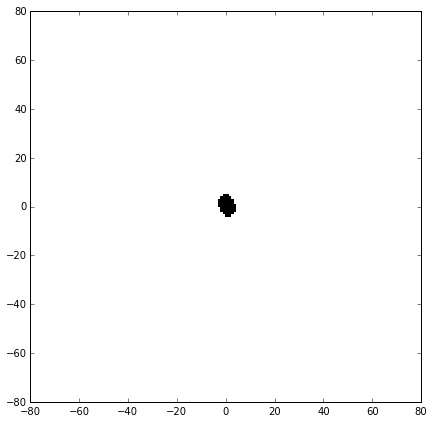

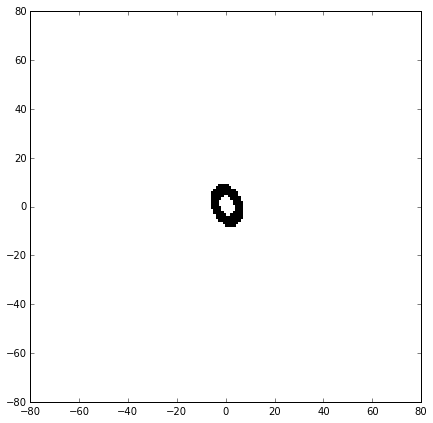

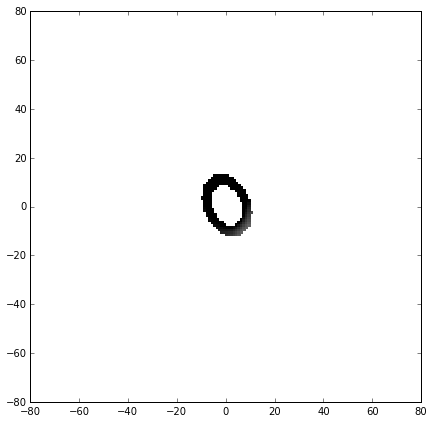

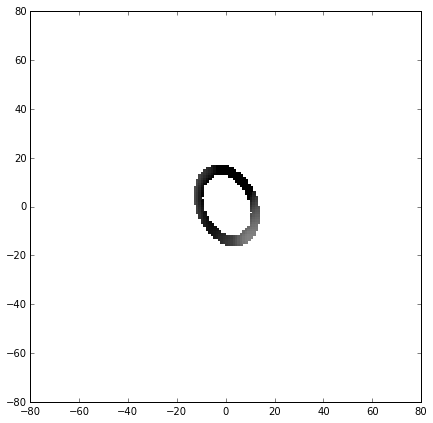

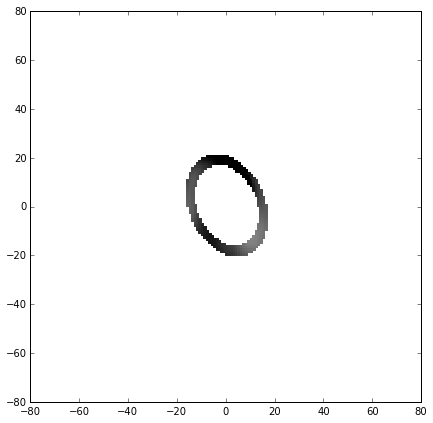

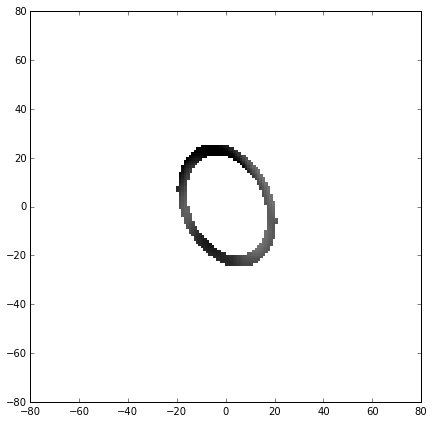

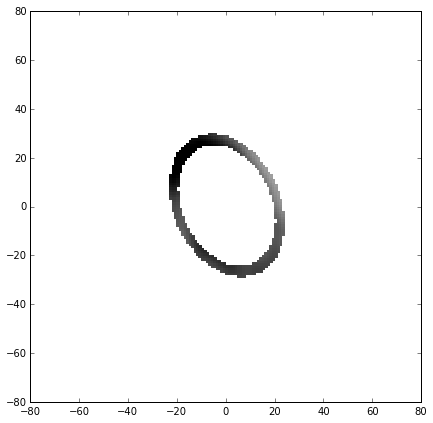

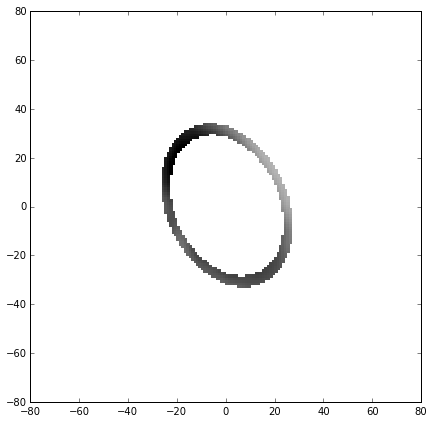

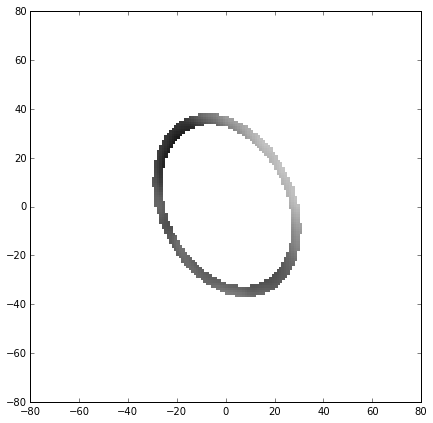

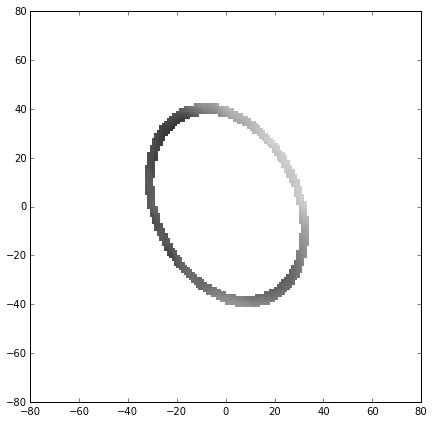

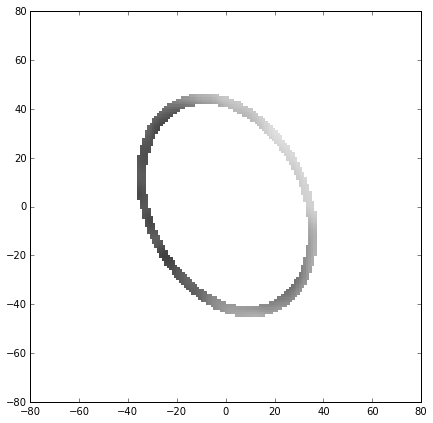

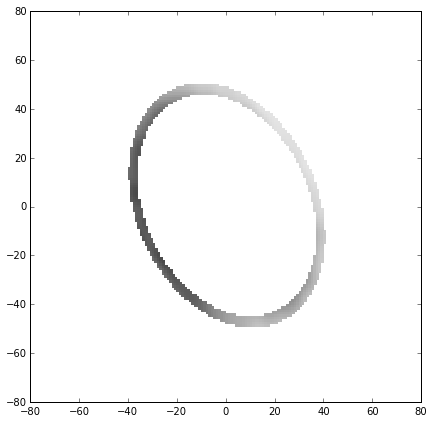

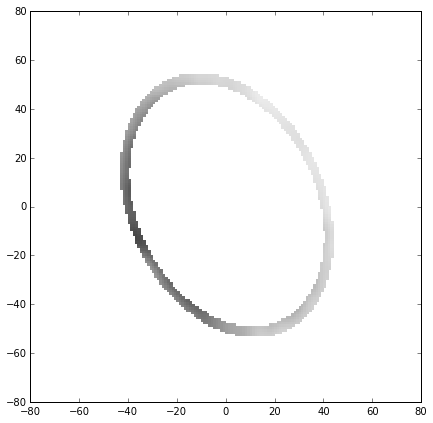

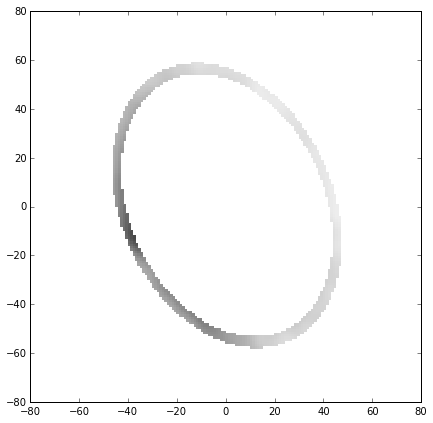

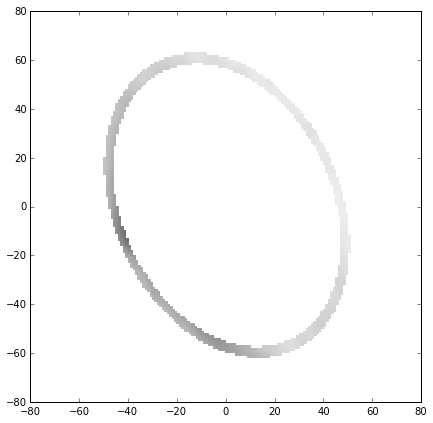

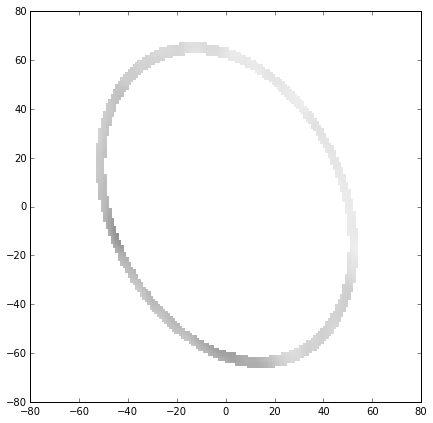

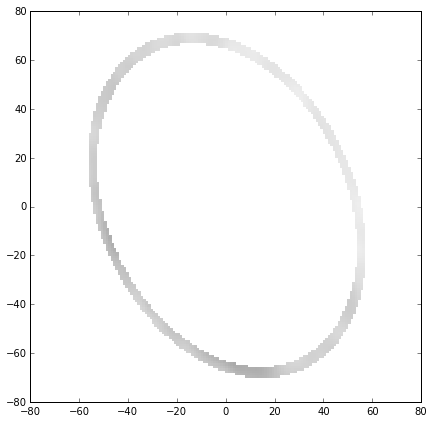

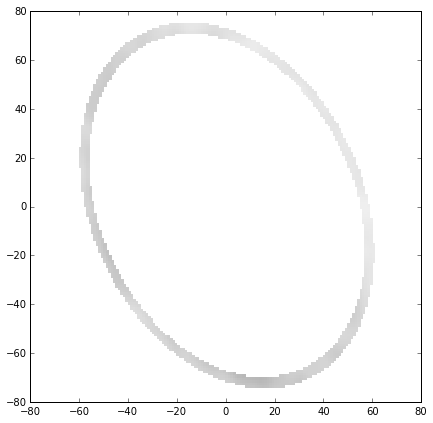

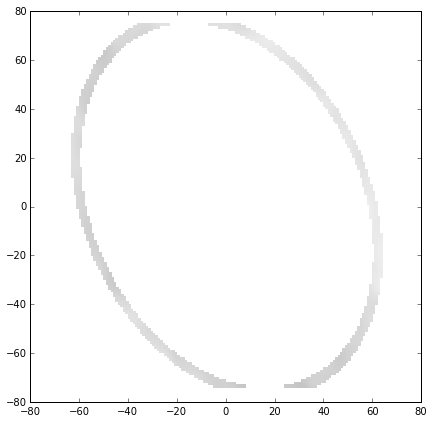

In [3]:
aper_fluxes=np.zeros(len(apertures))
error_aper_fluxes=np.zeros(len(apertures))
diff_aper_fluxes=np.zeros(len(apertures))
error_diff_aper_fluxes=np.zeros(len(apertures))
diff_area=np.zeros(len(apertures))

for i in range(len(apertures)):
    if i == 0:
        mask = r > apertures[0]
        maskinverse=r < apertures[0]
        maskinverse=~mask
        maskedimage=np.ma.MaskedArray(image[0,0,:,:], mask=mask)
        npixels=np.sum(~mask)
    elif i > 0:  
        mask1 = r > apertures[i-1]
        mask2 = r <= apertures[i]
        mask = mask1*mask2
        maskinverse=~mask
        maskedimage=np.ma.MaskedArray(image[0,0,:,:], mask=~mask)
        npixels=np.sum(mask)
    fig=plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    plt.pcolormesh(xgrid_off[950:1100],ygrid_off[950:1100],maskedimage[950:1100,950:1100]/jybm2jy, cmap='gray_r', vmin=-0.0014, vmax=0.01)
    aper_fluxes[i]=np.sum(maskedimage)

    error_aper_fluxes[i]=npixels/pixelsperbeam*rms
    if i == 0:
        diff_aper_fluxes[i]=aper_fluxes[i].copy()
        error_diff_aper_fluxes[i]=error_aper_fluxes[i].copy()
        diff_area[i]=(apertures[i]*pixscale*230.0)**2*3.14159
    elif i > 0:
        diff_aper_fluxes[i]=aper_fluxes[i].copy()
        error_diff_aper_fluxes[i]=error_aper_fluxes[i].copy()
        diff_area[i]=(apertures[i]*pixscale*230.0)**2*3.14159 -(apertures[i-1]*pixscale*230.0)**2*3.14159

    print apertures[i], aper_fluxes[i],error_aper_fluxes[i], diff_aper_fluxes[i],error_diff_aper_fluxes[i],npixels

    

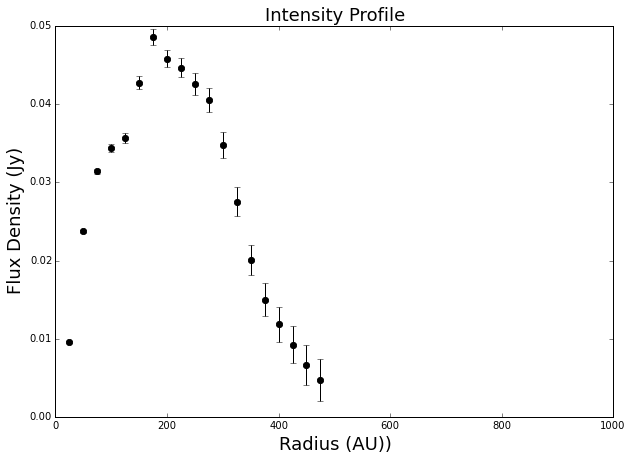

In [4]:
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlim(0,1000.0)
#ax.set_ylim(-0.001,0.01)

radii=apertures*pixscale*230.0
lin1=ax.plot(radii,diff_aper_fluxes,marker='o',color='black',linestyle='none')
lin1err=ax.errorbar(radii,diff_aper_fluxes, yerr=error_diff_aper_fluxes, fmt='o',color='black')

ax.set_title('Intensity Profile', fontsize=18)
ax.set_ylabel('Flux Density (Jy)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)


In [5]:
temp=(radii/1.0)**(-0.4)*200.0
print radii,temp

def emissive_mass(flux=None,lam=None,lam0=None,beta=None,kappa0=None,distance=None,temp=None):
    #temp=30.0
    kb=1.36e-16
    dgr=100.0
    flux=flux*1.0e-23
    nu=3.0e11/lam
    #print nu/1.0e9, 'GHz'
    #kappa0=3.5
    kappa=kappa0*(lam0/lam)**beta
    #print kappa, ' at ',lam,' mm'
    distance=distance*3.09e18
    mass=distance**2*flux*3e10**2/(2.0*kappa*kb*nu**2*temp)*dgr

    return mass

diff_percent_errors=error_diff_aper_fluxes/diff_aper_fluxes
percent_errors=error_aper_fluxes/aper_fluxes
mass_vs_r=emissive_mass(diff_aper_fluxes,1.3,1.3,1.0,0.899,230.0,temp)
total_mass_vs_r=emissive_mass(aper_fluxes,1.3,1.3,1.0,0.899,230.0,temp)

print mass_vs_r

sigma=mass_vs_r/(diff_area*1.496e13**2)
#sigma=mass_vs_r/(((apertures*pixscale*230.0*1.496e13)**2)*3.14159)
sigma2=total_mass_vs_r/(((apertures*pixscale*230.0*1.496e13)**2)*3.14159)
print sigma,sigma2

[  25.00853222   50.01706444   75.02559666  100.03412887  125.04266109
  150.05119331  175.05972553  200.06825775  225.07678997  250.08532219
  275.0938544   300.10238662  325.11091884  350.11945106  375.12798328
  400.1365155   425.14504772  450.15357994  475.16211215] [ 55.18165408  41.81987363  35.55872762  31.69353763  28.98722975
  26.94847627  25.33701791  24.01921002  22.91383126  21.96821217
  21.1464583   20.42312596  19.77959402  19.20186889  18.67919736
  18.20315727  17.76704269  17.36543682  16.99390844]
[  6.07319200e+30   1.98186472e+31   3.08435013e+31   3.78713295e+31
   4.30242947e+31   5.53886556e+31   6.69926260e+31   6.66270152e+31
   6.80924795e+31   6.77406806e+31   6.69200036e+31   5.95226027e+31
   4.86109073e+31   3.64761737e+31   2.80558787e+31   2.27236601e+31
   1.81253876e+31   1.33354369e+31   9.65096414e+30]
[ 13.81108862  15.02324161  14.02828462  12.30335095  10.87131679
  11.45088464  11.71910782  10.10113091   9.10879919   8.10787147
   7.24682146   

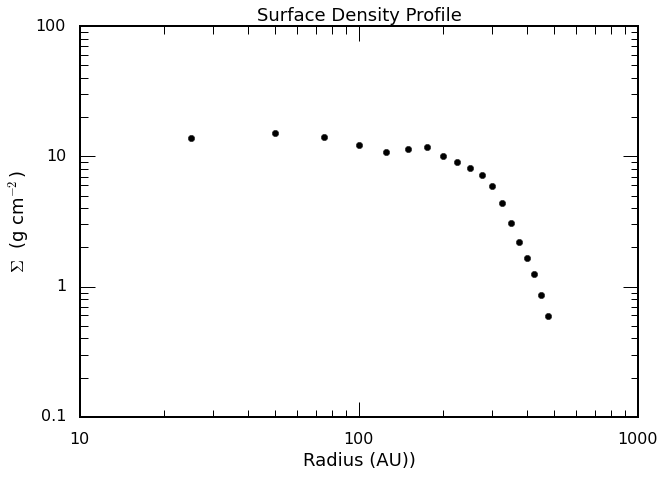

In [6]:
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlim(10,1000.0)
#ax.set_ylim(-0.001,0.01)

radii=apertures*pixscale*230.0
lin1=ax.loglog(radii,sigma,marker='o',color='black',linestyle='none')
#lin1err=ax.errorbar(radii,sigma, yerr=sigma*diff_percent_errors, fmt='o',color='black')
#lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
#lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(ticks_font)

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_title('Surface Density Profile', fontsize=18)
ax.set_ylabel('$\Sigma$  (g cm$^{-2}$)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)
plt.savefig('Per33-surface-density-loglog.eps')


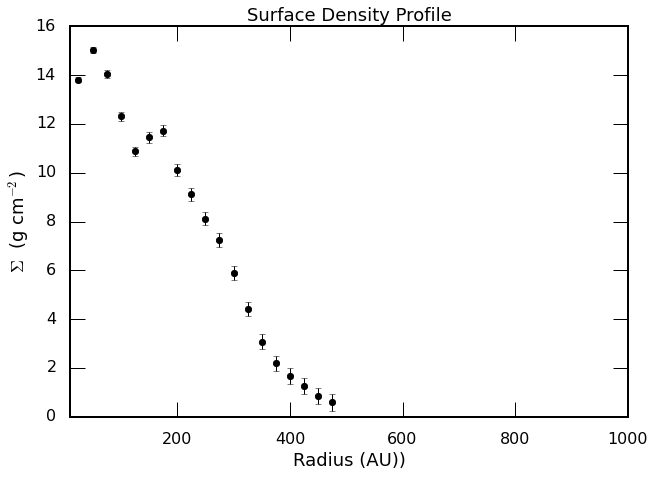

In [7]:
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlim(10,1000.0)
#ax.set_ylim(-0.001,0.01)

#radii=apertures*pixscale*230.0
lin1=ax.plot(radii,sigma,marker='o',color='black',linestyle='none')
lin1err=ax.errorbar(radii,sigma, yerr=sigma*diff_percent_errors, fmt='o',color='black')
#lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
#lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(ticks_font)

#for axis in [ax.xaxis, ax.yaxis]:
#    axis.set_major_formatter(ScalarFormatter())
#    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_title('Surface Density Profile', fontsize=18)
ax.set_ylabel('$\Sigma$  (g cm$^{-2}$)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)
plt.savefig('Per33-surface-density-linear.eps')
